# VGGtest

In [1]:
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
from keras import applications
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datasetpath = r'C:\Users\SurfacePro4\Desktop\dataset'
batch_size = 32
img_size = 128
vggmodel = applications.VGG16(include_top=False, weights='imagenet')

vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split = 0.2)

C:\Users\User\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


58892288/58889256 [==============================] - 17s 0us/step


In [2]:
train_generator = vgg_data_gen.flow_from_directory(
        r'C:\Users\User\Desktop\Chalmers\Introduction to Artifitial Intelligence\project final\dataset\training',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical', 
        shuffle=False)  

val_generator = vgg_data_gen.flow_from_directory(
        r'C:\Users\User\Desktop\Chalmers\Introduction to Artifitial Intelligence\project final\dataset\validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.


In [35]:
#extract features from train_generator (take quite long time)
X_train = vggmodel.predict_generator(train_generator, len(train_generator))

#save X_train (so we don't need to extract again)
filename = 'cnn_features_training(i128b32)'
with open(filename, 'wb') as f:
          np.save(f, X_train)

In [36]:
#extract features from val set
X_val = vggmodel.predict_generator(val_generator, len(val_generator))
filename = 'cnn_features_validation(i128b32)'
with open(filename, 'wb') as f:
          np.save(f, X_val)

**If you already have cnn_features_training/valid files, you can skip extraction cells (2 cells above)

In [3]:
from keras.utils.np_utils import to_categorical
num_classes = len(train_generator.class_indices)
nb_train_samples = len(train_generator.filenames)
nb_validation_samples = len(val_generator.filenames)

with open('cnn_features_training(i128b32)', 'rb') as f:
    X_train = np.load(f)
Y_train = train_generator.classes
Y_train = to_categorical(Y_train, num_classes=num_classes)

with open('cnn_features_validation(i128b32)', 'rb') as f:
    X_val = np.load(f)
Y_val = val_generator.classes
Y_val = to_categorical(Y_val, num_classes=num_classes)

In [77]:
Histories = {}
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

runsets = [(64,5),(128,4),(256,4),(512,3)]
for (n_neurons,layers) in runsets:
    for i in range(1,layers+1):
        #top model
        model = Sequential()
        model.add(Flatten(input_shape=X_train.shape[1:]))
        for j in range(i):
            model.add(Dense(n_neurons, activation='relu'))
            model.add(Dropout(0.5))
        model.add(Dense(num_classes, activation='softmax'))
        model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
        
        name=str(n_neurons)+'x'+str(i)+'layers'
        print("Model: "+name)
        History = model.fit(X_train, 
                            Y_train,
                            epochs=50,
                            batch_size=batch_size,
                            validation_data=(X_val, Y_val)
#                             callbacks=[early_stopping]
                            )
        Histories[name]=History.history

Model: 64x1layers
Train on 2197 samples, validate on 612 samples
Epoch 1/50
2197/2197 [==============================] - 3s 1ms/step - loss: 3.9812 - acc: 0.5967 - val_loss: 0.9048 - val_acc: 0.7533
Epoch 2/50
2197/2197 [==============================] - 2s 687us/step - loss: 1.0061 - acc: 0.6568 - val_loss: 0.6797 - val_acc: 0.7598
Epoch 3/50
2197/2197 [==============================] - 2s 719us/step - loss: 0.7642 - acc: 0.7000 - val_loss: 0.6460 - val_acc: 0.8023
Epoch 4/50
2197/2197 [==============================] - 2s 732us/step - loss: 0.7131 - acc: 0.7351 - val_loss: 0.5608 - val_acc: 0.8252
Epoch 5/50
2197/2197 [==============================] - 2s 795us/step - loss: 0.5963 - acc: 0.7783 - val_loss: 0.5019 - val_acc: 0.8464
Epoch 6/50
2197/2197 [==============================] - 2s 773us/step - loss: 0.5536 - acc: 0.7920 - val_loss: 0.4986 - val_acc: 0.8480
Epoch 7/50
2197/2197 [==============================] - 2s 795us/step - loss: 0.5288 - acc: 0.8147 - val_loss: 0.5590 - v

2197/2197 [==============================] - 2s 785us/step - loss: 1.0140 - acc: 0.5926 - val_loss: 0.9665 - val_acc: 0.7288
Epoch 11/50
2197/2197 [==============================] - 2s 769us/step - loss: 0.9901 - acc: 0.6045 - val_loss: 0.9341 - val_acc: 0.7729
Epoch 12/50
2197/2197 [==============================] - 2s 789us/step - loss: 0.9449 - acc: 0.6086 - val_loss: 0.8786 - val_acc: 0.7794
Epoch 13/50
2197/2197 [==============================] - 2s 781us/step - loss: 0.9303 - acc: 0.6117 - val_loss: 0.8322 - val_acc: 0.7516
Epoch 14/50
2197/2197 [==============================] - 2s 790us/step - loss: 0.8796 - acc: 0.6017 - val_loss: 0.9181 - val_acc: 0.7337
Epoch 15/50
2197/2197 [==============================] - 2s 788us/step - loss: 0.8862 - acc: 0.6249 - val_loss: 0.7939 - val_acc: 0.7451
Epoch 16/50
2197/2197 [==============================] - 2s 783us/step - loss: 0.8585 - acc: 0.6259 - val_loss: 0.7765 - val_acc: 0.7876
Epoch 17/50
2197/2197 [==============================

2197/2197 [==============================] - 2s 804us/step - loss: 1.2119 - acc: 0.4360 - val_loss: 0.9883 - val_acc: 0.5507
Epoch 20/50
2197/2197 [==============================] - 2s 802us/step - loss: 1.2012 - acc: 0.4397 - val_loss: 1.1608 - val_acc: 0.5000
Epoch 21/50
2197/2197 [==============================] - 2s 798us/step - loss: 1.1972 - acc: 0.4342 - val_loss: 0.9683 - val_acc: 0.5392
Epoch 22/50
2197/2197 [==============================] - 2s 781us/step - loss: 1.2124 - acc: 0.4438 - val_loss: 1.0249 - val_acc: 0.5310
Epoch 23/50
2197/2197 [==============================] - 2s 782us/step - loss: 1.2325 - acc: 0.4370 - val_loss: 1.0257 - val_acc: 0.4967
Epoch 24/50
2197/2197 [==============================] - 2s 793us/step - loss: 1.1779 - acc: 0.4338 - val_loss: 0.9869 - val_acc: 0.5752
Epoch 25/50
2197/2197 [==============================] - 2s 777us/step - loss: 1.1911 - acc: 0.4456 - val_loss: 0.9850 - val_acc: 0.5670
Epoch 26/50
2197/2197 [==============================

2197/2197 [==============================] - 2s 818us/step - loss: 1.3843 - acc: 0.2658 - val_loss: 1.3853 - val_acc: 0.2745
Epoch 29/50
2197/2197 [==============================] - 2s 798us/step - loss: 1.3829 - acc: 0.2717 - val_loss: 1.3853 - val_acc: 0.2745
Epoch 30/50
2197/2197 [==============================] - 2s 820us/step - loss: 1.3853 - acc: 0.2654 - val_loss: 1.3852 - val_acc: 0.2745
Epoch 31/50
2197/2197 [==============================] - 2s 820us/step - loss: 1.3900 - acc: 0.2635 - val_loss: 1.3853 - val_acc: 0.2745
Epoch 32/50
2197/2197 [==============================] - 2s 872us/step - loss: 1.3822 - acc: 0.2622 - val_loss: 1.3854 - val_acc: 0.2745
Epoch 33/50
2197/2197 [==============================] - 2s 811us/step - loss: 1.3828 - acc: 0.2622 - val_loss: 1.3853 - val_acc: 0.2745
Epoch 34/50
2197/2197 [==============================] - 2s 822us/step - loss: 1.3866 - acc: 0.2590 - val_loss: 1.3853 - val_acc: 0.2745
Epoch 35/50
2197/2197 [==============================

2197/2197 [==============================] - 2s 831us/step - loss: 1.3837 - acc: 0.2649 - val_loss: 1.3851 - val_acc: 0.2745
Epoch 38/50
2197/2197 [==============================] - 2s 820us/step - loss: 1.3834 - acc: 0.2676 - val_loss: 1.3850 - val_acc: 0.2745
Epoch 39/50
2197/2197 [==============================] - 2s 806us/step - loss: 1.3840 - acc: 0.2581 - val_loss: 1.3852 - val_acc: 0.2745
Epoch 40/50
2197/2197 [==============================] - 2s 827us/step - loss: 1.3838 - acc: 0.2585 - val_loss: 1.3851 - val_acc: 0.2745
Epoch 41/50
2197/2197 [==============================] - 2s 828us/step - loss: 1.3836 - acc: 0.2563 - val_loss: 1.3849 - val_acc: 0.2745
Epoch 42/50
2197/2197 [==============================] - 2s 834us/step - loss: 1.3846 - acc: 0.2631 - val_loss: 1.3852 - val_acc: 0.2745
Epoch 43/50
2197/2197 [==============================] - 2s 827us/step - loss: 1.3838 - acc: 0.2640 - val_loss: 1.3856 - val_acc: 0.2435
Epoch 44/50
2197/2197 [==============================

2197/2197 [==============================] - 3s 1ms/step - loss: 0.3086 - acc: 0.9686 - val_loss: 1.3956 - val_acc: 0.8791
Epoch 48/50
2197/2197 [==============================] - 3s 1ms/step - loss: 0.4161 - acc: 0.9654 - val_loss: 1.5435 - val_acc: 0.8693
Epoch 49/50
2197/2197 [==============================] - 3s 1ms/step - loss: 0.3757 - acc: 0.9640 - val_loss: 1.5174 - val_acc: 0.8758
Epoch 50/50
2197/2197 [==============================] - 3s 1ms/step - loss: 0.3695 - acc: 0.9599 - val_loss: 1.6584 - val_acc: 0.8709
Model: 128x2layers
Train on 2197 samples, validate on 612 samples
Epoch 1/50
2197/2197 [==============================] - 5s 2ms/step - loss: 7.4189 - acc: 0.4574 - val_loss: 2.2476 - val_acc: 0.7974
Epoch 2/50
2197/2197 [==============================] - 3s 1ms/step - loss: 4.9232 - acc: 0.6468 - val_loss: 2.4720 - val_acc: 0.8039
Epoch 3/50
2197/2197 [==============================] - 3s 1ms/step - loss: 4.1187 - acc: 0.6959 - val_loss: 2.5950 - val_acc: 0.8105
Epoc

Epoch 7/50
2197/2197 [==============================] - ETA: 0s - loss: 4.1967 - acc: 0.712 - 3s 1ms/step - loss: 4.1919 - acc: 0.7132 - val_loss: 2.5907 - val_acc: 0.8170
Epoch 8/50
2197/2197 [==============================] - 3s 1ms/step - loss: 3.7901 - acc: 0.7346 - val_loss: 2.9949 - val_acc: 0.8007
Epoch 9/50
2197/2197 [==============================] - 3s 1ms/step - loss: 3.7824 - acc: 0.7428 - val_loss: 2.8453 - val_acc: 0.8056
Epoch 10/50
2197/2197 [==============================] - 3s 1ms/step - loss: 3.5263 - acc: 0.7597 - val_loss: 2.3686 - val_acc: 0.8333
Epoch 11/50
2197/2197 [==============================] - 3s 1ms/step - loss: 3.4435 - acc: 0.7651 - val_loss: 2.1448 - val_acc: 0.8562
Epoch 12/50
2197/2197 [==============================] - 3s 1ms/step - loss: 2.9613 - acc: 0.7893 - val_loss: 2.0381 - val_acc: 0.8578
Epoch 13/50
2197/2197 [==============================] - 3s 1ms/step - loss: 2.9876 - acc: 0.7870 - val_loss: 2.1710 - val_acc: 0.8513
Epoch 14/50
2197/219

Epoch 17/50
2197/2197 [==============================] - 3s 1ms/step - loss: 5.4660 - acc: 0.6532 - val_loss: 2.9341 - val_acc: 0.8056
Epoch 18/50
2197/2197 [==============================] - 3s 1ms/step - loss: 5.0333 - acc: 0.6773 - val_loss: 3.2607 - val_acc: 0.7925
Epoch 19/50
2197/2197 [==============================] - 3s 1ms/step - loss: 4.7123 - acc: 0.6991 - val_loss: 3.1054 - val_acc: 0.8007
Epoch 20/50
2197/2197 [==============================] - 3s 1ms/step - loss: 4.6864 - acc: 0.7051 - val_loss: 3.5846 - val_acc: 0.7745
Epoch 21/50
2197/2197 [==============================] - 3s 1ms/step - loss: 4.5752 - acc: 0.7096 - val_loss: 3.0415 - val_acc: 0.8039
Epoch 22/50
2197/2197 [==============================] - 3s 1ms/step - loss: 4.5911 - acc: 0.7060 - val_loss: 3.1552 - val_acc: 0.7974
Epoch 23/50
2197/2197 [==============================] - 3s 1ms/step - loss: 4.1810 - acc: 0.7337 - val_loss: 2.8563 - val_acc: 0.8203
Epoch 24/50
2197/2197 [==============================] 

2197/2197 [==============================] - 5s 2ms/step - loss: 2.1598 - acc: 0.8625 - val_loss: 2.0661 - val_acc: 0.8676
Epoch 28/50
2197/2197 [==============================] - 5s 2ms/step - loss: 2.2097 - acc: 0.8589 - val_loss: 2.8512 - val_acc: 0.8203
Epoch 29/50
2197/2197 [==============================] - 5s 2ms/step - loss: 2.3462 - acc: 0.8493 - val_loss: 3.0734 - val_acc: 0.8056
Epoch 30/50
2197/2197 [==============================] - 5s 2ms/step - loss: 2.1465 - acc: 0.8625 - val_loss: 2.6525 - val_acc: 0.8317
Epoch 31/50
2197/2197 [==============================] - 5s 2ms/step - loss: 2.0217 - acc: 0.8689 - val_loss: 2.6996 - val_acc: 0.8284
Epoch 32/50
2197/2197 [==============================] - 5s 2ms/step - loss: 1.8864 - acc: 0.8785 - val_loss: 2.3400 - val_acc: 0.8513
Epoch 33/50
2197/2197 [==============================] - 5s 2ms/step - loss: 1.6087 - acc: 0.8967 - val_loss: 2.4529 - val_acc: 0.8431
Epoch 34/50
2197/2197 [==============================] - 5s 2ms/ste

Epoch 37/50
2197/2197 [==============================] - 5s 2ms/step - loss: 2.5648 - acc: 0.8384 - val_loss: 2.6103 - val_acc: 0.8366
Epoch 38/50
2197/2197 [==============================] - 5s 2ms/step - loss: 2.7904 - acc: 0.8252 - val_loss: 3.2750 - val_acc: 0.7908
Epoch 39/50
2197/2197 [==============================] - 5s 2ms/step - loss: 2.8801 - acc: 0.8207 - val_loss: 2.1460 - val_acc: 0.8644
Epoch 40/50
2197/2197 [==============================] - 5s 2ms/step - loss: 2.5300 - acc: 0.8411 - val_loss: 2.1303 - val_acc: 0.8660
Epoch 41/50
2197/2197 [==============================] - 5s 2ms/step - loss: 2.5282 - acc: 0.8421 - val_loss: 2.4480 - val_acc: 0.8464
Epoch 42/50
2197/2197 [==============================] - 5s 2ms/step - loss: 2.6987 - acc: 0.8320 - val_loss: 2.8524 - val_acc: 0.8219
Epoch 43/50
2197/2197 [==============================] - 5s 2ms/step - loss: 3.0394 - acc: 0.8102 - val_loss: 2.7129 - val_acc: 0.8317
Epoch 44/50
2197/2197 [==============================] 

2197/2197 [==============================] - 5s 2ms/step - loss: 5.0565 - acc: 0.6846 - val_loss: 4.9250 - val_acc: 0.6944
Epoch 48/50
2197/2197 [==============================] - 5s 2ms/step - loss: 5.1577 - acc: 0.6800 - val_loss: 4.7515 - val_acc: 0.7026
Epoch 49/50
2197/2197 [==============================] - 5s 2ms/step - loss: 4.4715 - acc: 0.7219 - val_loss: 4.8648 - val_acc: 0.6977
Epoch 50/50
2197/2197 [==============================] - 5s 2ms/step - loss: 4.5914 - acc: 0.7146 - val_loss: 3.6081 - val_acc: 0.7761
Model: 256x4layers
Train on 2197 samples, validate on 612 samples
Epoch 1/50
2197/2197 [==============================] - 8s 3ms/step - loss: 11.0035 - acc: 0.2713 - val_loss: 10.7532 - val_acc: 0.3088
Epoch 2/50
2197/2197 [==============================] - 5s 2ms/step - loss: 10.2692 - acc: 0.3487 - val_loss: 8.1540 - val_acc: 0.4918
Epoch 3/50
2197/2197 [==============================] - 5s 2ms/step - loss: 9.4499 - acc: 0.3978 - val_loss: 8.1905 - val_acc: 0.4869
E

Epoch 7/50
2197/2197 [==============================] - 8s 4ms/step - loss: 3.0388 - acc: 0.8034 - val_loss: 3.3431 - val_acc: 0.7892
Epoch 8/50
2197/2197 [==============================] - 8s 4ms/step - loss: 2.8424 - acc: 0.8147 - val_loss: 3.0933 - val_acc: 0.8007
Epoch 9/50
2197/2197 [==============================] - 8s 4ms/step - loss: 2.6589 - acc: 0.8293 - val_loss: 2.9025 - val_acc: 0.8154
Epoch 10/50
2197/2197 [==============================] - 8s 4ms/step - loss: 2.4800 - acc: 0.8416 - val_loss: 2.8030 - val_acc: 0.8154
Epoch 11/50
2197/2197 [==============================] - 8s 4ms/step - loss: 3.1972 - acc: 0.7965 - val_loss: 3.3209 - val_acc: 0.7859
Epoch 12/50
2197/2197 [==============================] - 8s 4ms/step - loss: 2.5142 - acc: 0.8380 - val_loss: 2.7507 - val_acc: 0.8219
Epoch 13/50
2197/2197 [==============================] - 8s 4ms/step - loss: 2.8246 - acc: 0.8207 - val_loss: 3.0135 - val_acc: 0.8105
Epoch 14/50
2197/2197 [==============================] - 8

2197/2197 [==============================] - 9s 4ms/step - loss: 5.7955 - acc: 0.6400 - val_loss: 5.3263 - val_acc: 0.6667
Epoch 18/50
2197/2197 [==============================] - 9s 4ms/step - loss: 5.3248 - acc: 0.6673 - val_loss: 5.6614 - val_acc: 0.6487
Epoch 19/50
2197/2197 [==============================] - 9s 4ms/step - loss: 5.0194 - acc: 0.6873 - val_loss: 3.9637 - val_acc: 0.7533
Epoch 20/50
2197/2197 [==============================] - 9s 4ms/step - loss: 4.6402 - acc: 0.7110 - val_loss: 4.7720 - val_acc: 0.7026
Epoch 21/50
2197/2197 [==============================] - 9s 4ms/step - loss: 5.2929 - acc: 0.6705 - val_loss: 5.2411 - val_acc: 0.6732
Epoch 22/50
2197/2197 [==============================] - 9s 4ms/step - loss: 5.0817 - acc: 0.6832 - val_loss: 4.0559 - val_acc: 0.7484
Epoch 23/50
2197/2197 [==============================] - 9s 4ms/step - loss: 4.6386 - acc: 0.7110 - val_loss: 4.4557 - val_acc: 0.7222
Epoch 24/50
2197/2197 [==============================] - 9s 4ms/ste

2197/2197 [==============================] - 10s 4ms/step - loss: 8.9944 - acc: 0.4420 - val_loss: 8.8755 - val_acc: 0.4493
Epoch 28/50
2197/2197 [==============================] - 10s 4ms/step - loss: 8.9357 - acc: 0.4456 - val_loss: 8.8755 - val_acc: 0.4493
Epoch 29/50
2197/2197 [==============================] - 10s 4ms/step - loss: 8.5162 - acc: 0.4716 - val_loss: 8.3488 - val_acc: 0.4820
Epoch 30/50
2197/2197 [==============================] - 10s 4ms/step - loss: 8.4515 - acc: 0.4756 - val_loss: 8.3488 - val_acc: 0.4820
Epoch 31/50
2197/2197 [==============================] - 10s 4ms/step - loss: 8.4882 - acc: 0.4734 - val_loss: 8.3488 - val_acc: 0.4820
Epoch 32/50
2197/2197 [==============================] - 10s 5ms/step - loss: 8.4002 - acc: 0.4788 - val_loss: 8.3488 - val_acc: 0.4820
Epoch 33/50
2197/2197 [==============================] - 10s 5ms/step - loss: 8.5689 - acc: 0.4684 - val_loss: 8.3488 - val_acc: 0.4820
Epoch 34/50
2197/2197 [==============================] - 10s

In [78]:
#Save histories
with open('runHistories', 'wb') as f:
          np.save(f, Histories)
        
# import json
# json.dump(Histories, open('jsonHistory','w'))

In [76]:
#Load histories
with open('runHistories', 'rb') as f:
    lHistories = np.load(f)
type(Histories)==type(lHistories)

False

64x1layers


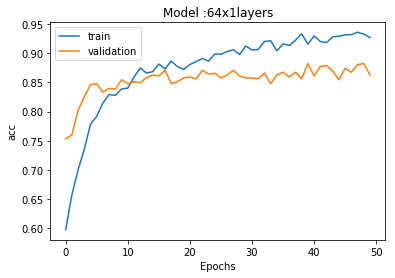

64x2layers


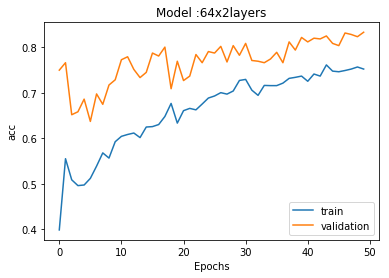

64x3layers


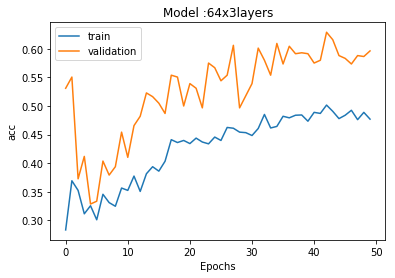

64x4layers


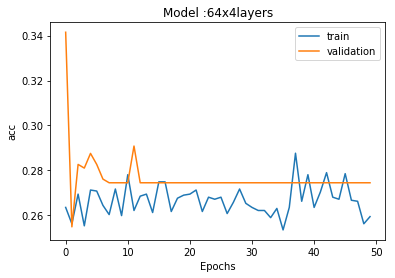

64x5layers


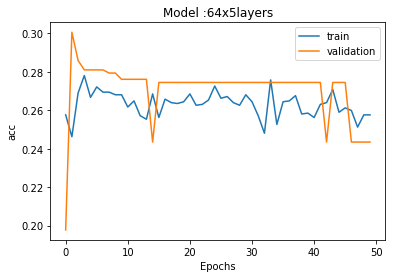

128x1layers


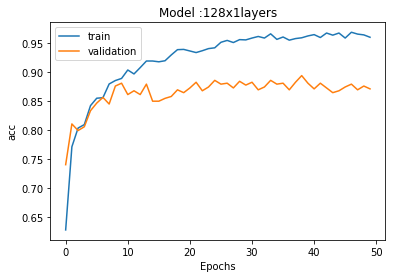

128x2layers


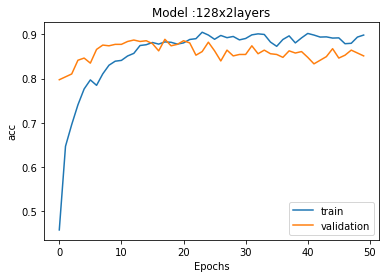

128x3layers


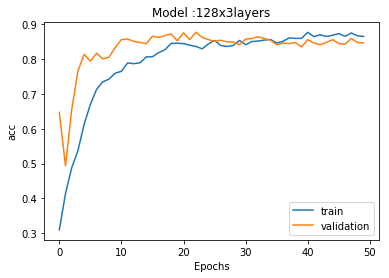

128x4layers


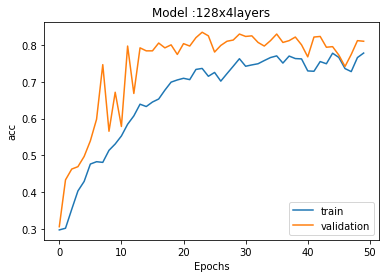

256x1layers


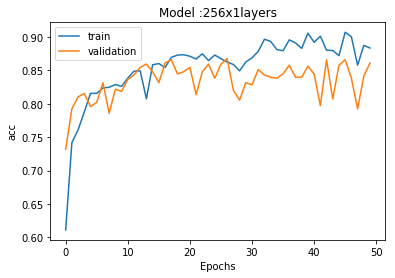

256x2layers


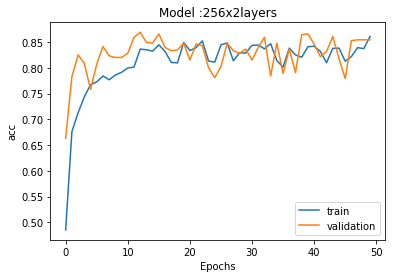

256x3layers


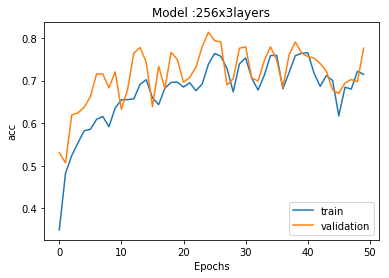

256x4layers


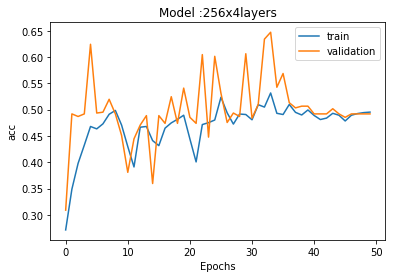

512x1layers


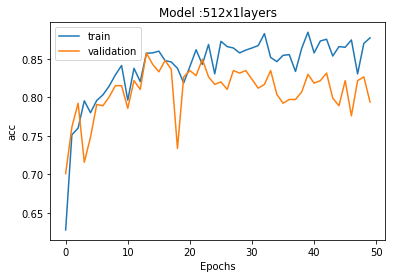

512x2layers


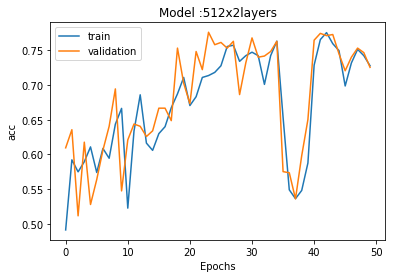

512x3layers


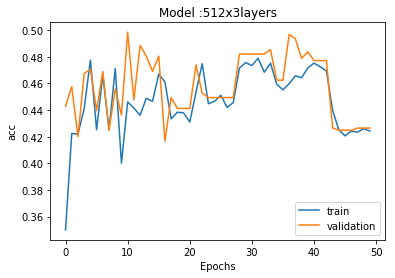

In [79]:
import matplotlib.pyplot as plt
def draw_graph(History, arg, name): #arg = acc|loss
#     plt.tight_layout()
    plt.plot(History[arg])
    val_arg = 'val_' + arg
    plt.plot(History[val_arg])
    plt.title('Model :'+ name)
    plt.ylabel(arg)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.show()

for (n_neurons,layers) in runsets:
    for i in range(1,layers+1):
        name=str(n_neurons)+'x'+str(i)+'layers'
        print(name)
        draw_graph(Histories[name],'acc',name)

In [ ]:
# #test on test set
# test_generator = vgg_data_gen.flow_from_directory(
#         r'C:\Users\SurfacePro4\Desktop\dataset\testing',
#         target_size=(img_size, img_size),
# #         batch_size=batch_size,
#         class_mode='categorical',
#         shuffle=False)
# cnn_features = model.predict_generator(val_generator, len(val_generator))

In [ ]:
# from sklearn.metrics import confusion_matrix

# def create_cm_for_test(testdatapath = r'C:\Users\SurfacePro4\Desktop\dataset\testing', img_size = 128):
#     datagen = ImageDataGenerator(rescale = 1./255)
#     test_generator = datagen.flow_from_directory(testdatapath,
#                                             target_size = (img_size, img_size),
#                                             class_mode = 'categorical',
#                                             shuffle = False
#                                             )
#     Y_pred = model.predict_generator(test_generator, len(test_generator))
#     y_pred = np.argmax(Y_pred, axis=1)
#     cm = confusion_matrix(test_generator.classes, y_pred)
#     plot_confusion_matrix(cm, test_generator.class_indices)
    
# create_cm_for_test()

In [69]:
for (x,y) in [(1,2),(3,4)]:
    print(x+y)

3
7
